In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

import scipy.integrate

In [3]:
m1 = 1
(x1, y1) = (1.0, 0.0)
(vx1, vy1) = (0, 0.2)

m2 = 2
(x2, y2) = (-0.5, 0.0)
(vx2, vy2) = (0, -0.1)

In [4]:
def grav(x1, y1, x2, y2):   
    # inverse square law between two particles mass m1, m2
    dx = x2 - x1
    dy = y2 - y1
    r2 = dx * dx + dy * dy
    r3 = r2 ** 1.5
    fx = dx / r3
    fy = dy / r3
    return (fx/m1, fy/m1, -fx/m2, -fy/m2)

In [5]:
rs = [x1, y1, x2, y2]
vs = [vx1, vy1, vx2, vy2]
y = rs + vs

In [6]:
def fun(t, y):
    (x1, y1, x2, y2, vx1, vy1, vx2, vy2) = tuple(y)
    (ax1, ay1, ax2, ay2) = grav(x1, y1, x2, y2)
    return [vx1, vy1, vx2, vy2, ax1, ay1, ax2, ay2]

In [7]:
res = scipy.integrate.solve_ivp(fun, (0, 50), y)
ts = res.t
ys = res.y


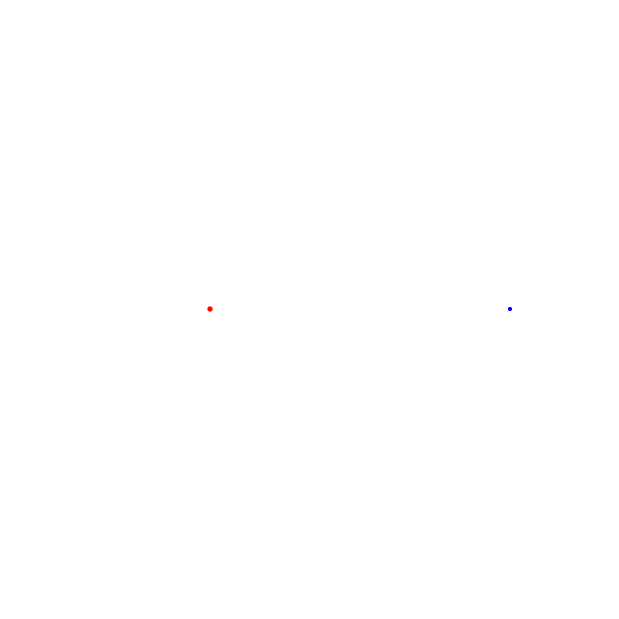

In [8]:
fig = plt.figure(figsize=[6,6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-1.5,1.5), ylim=(-1.5,1.5))
ax.set_aspect('equal')
ax.axis('off')
l = ax.scatter([x1, x2], [y1, y2], c=['blue', 'red'], s=[4, 8])

In [9]:
def animate(i):
    l.set_offsets(np.reshape(ys [0:4, i], (2,2)))


In [10]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(ts))

In [11]:
from IPython.display import HTML
HTML(ani.to_jshtml())